In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
file_path = 'WDI2022.csv'
df_final = pd.read_csv(file_path)

In [25]:
df_final.shape

(217, 17)

In [26]:
df_final.head()

,Country Name,corruption_perception_estimate,access_to_electricity_percent,co2_emissions_per_capita,mobile_cellular_subscriptions_per_100_people,agriculture_value_added_percent_gdp,industry_value_added_percent_gdp,gdp_growth_annual_percent,gdp_per_capita_usd,stability_of_government_estimate,health_expenditure_pct_gdp,child_mortality_rate,life_expectancy_at_birth,fertility_rate_total,population_65_plus_percent,population_total,urban_population_percent
0,Afghanistan,-1.183684,85.30,0.203552,56.26550,33.701432,16.050368,-6.240172,357.261153,-2.544956,23.088169,52.00,65.617,4.932,2.355142,40578842.0,26.616
1,Albania,-0.408189,100.00,1.659293,98.39500,16.984478,23.025056,4.826696,6846.426694,0.106261,6.193681,8.30,78.769,1.355,15.776338,2777689.0,63.799
2,Algeria,-0.638041,100.00,4.104114,107.78700,10.613178,43.048057,3.600000,4961.552577,-0.650652,3.623043,20.00,76.129,2.817,6.186964,45477389.0,74.772
3,American Samoa,1.270272,95.18,0.002069,122.31764,7.658086,19.785807,1.735016,18017.458938,1.123174,10.395107,19.12,72.752,2.305,7.103627,48342.0,87.196
4,Andorra,1.270272,100.00,4.383951,142.42600,0.487492,11.145341,9.564612,42414.059009,1.585988,7.536788,2.60,84.016,1.071,14.968948,79705.0,87.811


### Step 1: Data preparation and scaling

In [ ]:
countries = df_final['Country Name']
X = df_final.drop('Country Name', axis=1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Step 2: Find the ideal number of clusters (K)


--- Starting Step 2: Finding the ideal K ---


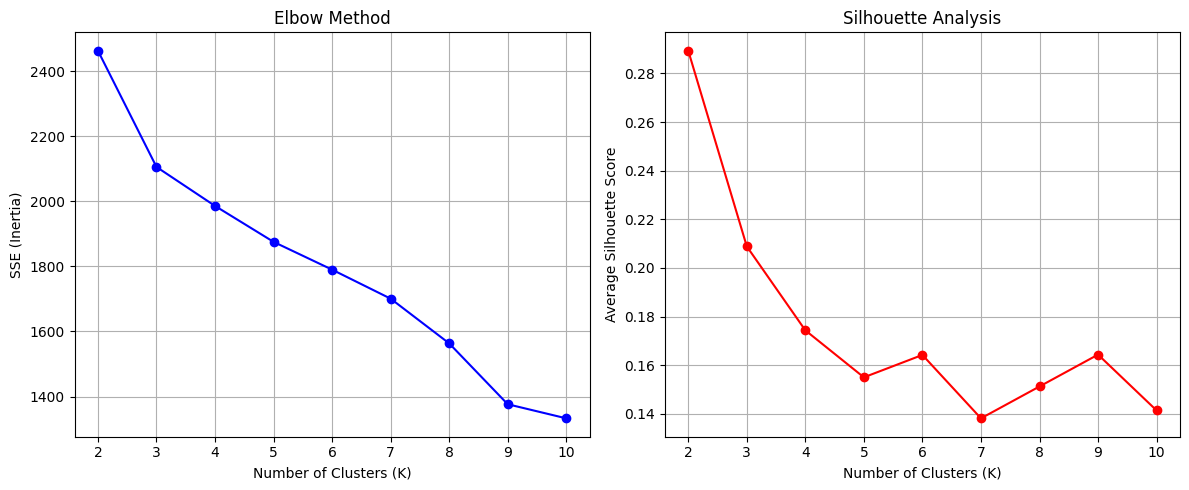

Analyze the plots. In the 'Elbow Method', look for the point where the curve smooths out.
In the 'Silhouette Analysis', look for the highest point (peak).


In [28]:
print("\n--- Starting Step 2: Finding the ideal K ---")

# Test from 2 to 10 clusters.
k_range = range(2, 11)
sse = [] # Sum of Squared Errors (for the Elbow Method)
silhouette_scores = [] # For Silhouette Analysis

for k in k_range:
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)

    # For the Elbow Method
    sse.append(kmeans.inertia_)

    # For Silhouette Analysis
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting the Elbow Method
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method')
plt.grid(True)

# Plotting Silhouette Analysis
plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, 'ro-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Analyze the plots. In the 'Elbow Method', look for the point where the curve smooths out.")
print("In the 'Silhouette Analysis', look for the highest point (peak).")

### Step 3: Apply K-Means with the ideal K

In [29]:
# After analysis, K=3 seems like a good choice.
OPTIMAL_K = 3

print(f"\n--- Starting Step 3: Applying K-Means with K={OPTIMAL_K} ---")

kmeans_final = KMeans(n_clusters=OPTIMAL_K, random_state=42, n_init='auto')
clusters = kmeans_final.fit_predict(X_scaled)

# Add the results (the cluster number) back to the original dataframe
df_final['Cluster'] = clusters

print("Clustering complete and results have been added to the dataframe.")


--- Starting Step 3: Applying K-Means with K=3 ---
Clustering complete and results have been added to the dataframe.


### Step 4: Analysis and interpretation of results

In [30]:
print("\n--- Starting Step 4: Cluster Analysis ---")

# 1. View the distribution of countries by cluster
print("\nCountry count per cluster:")
print(df_final['Cluster'].value_counts().sort_index())


--- Starting Step 4: Cluster Analysis ---

Country count per cluster:
Cluster
0    95
1    74
2    48
Name: count, dtype: int64


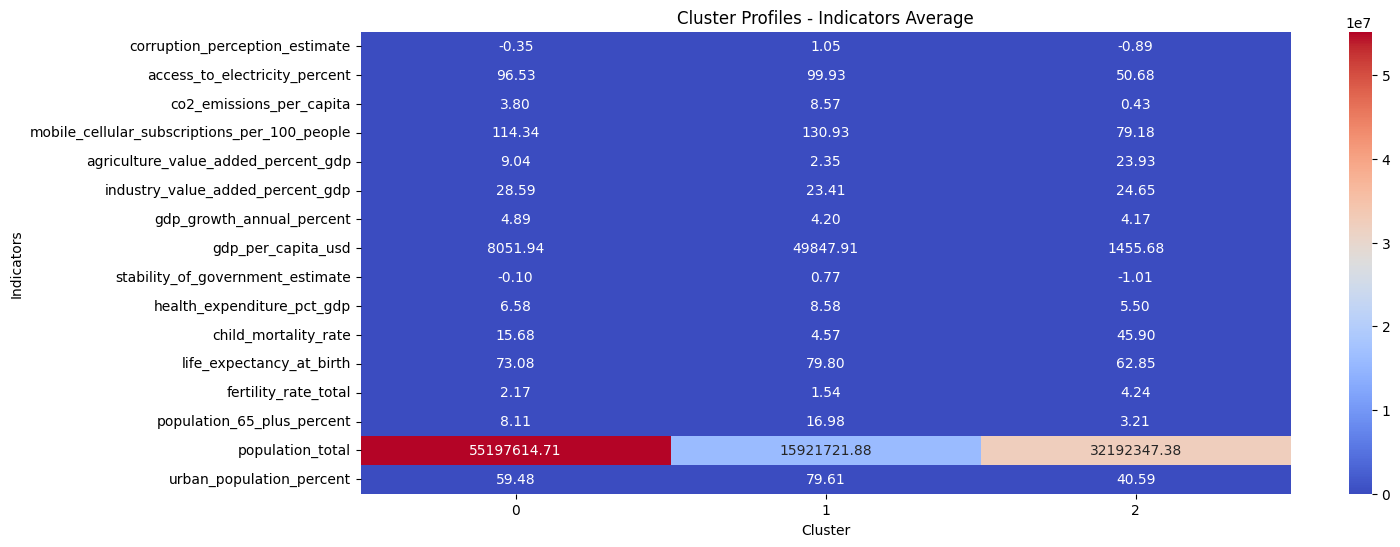

In [31]:
# 2. Analyze the "profile" of each cluster
cluster_profiles = df_final.groupby('Cluster').mean(numeric_only=True)

plt.figure(figsize=(15, 6))
sns.heatmap(cluster_profiles.T, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Cluster Profiles - Indicators Average')
plt.ylabel('Indicators')
plt.show()

In [32]:
# 3. View some countries from a specific cluster for better understanding
print("\nExample: Top 10 countries in Cluster 0:")
print(df_final[df_final['Cluster'] == 0]['Country Name'].head(20))

print("\nExample: Top 10 countries in Cluster 1:")
print(df_final[df_final['Cluster'] == 1]['Country Name'].head(20))

print("\nExample: Top 10 countries in Cluster 2:")
print(df_final[df_final['Cluster'] == 2]['Country Name'].head(20))


Example: Top 10 countries in Cluster 0:
1                    Albania
2                    Algeria
6        Antigua and Barbuda
7                  Argentina
8                    Armenia
12                Azerbaijan
14                   Bahrain
15                Bangladesh
17                   Belarus
19                    Belize
22                    Bhutan
23                   Bolivia
24    Bosnia and Herzegovina
25                  Botswana
26                    Brazil
27    British Virgin Islands
32                Cabo Verde
33                  Cambodia
41                     China
42                  Colombia
Name: Country Name, dtype: object

Example: Top 10 countries in Cluster 1:
3        American Samoa
4               Andorra
9                 Aruba
10            Australia
11              Austria
13         Bahamas, The
16             Barbados
18              Belgium
21              Bermuda
28    Brunei Darussalam
29             Bulgaria
35               Canada
36       Cayman 

### All countries by each cluster

In [33]:
# Output filename
output_filename = "country_list_by_cluster.txt"
OPTIMAL_K = 3 # The number of clusters you defined

try:
    # Open the file for writing
    with open(output_filename, "w", encoding="utf-8") as f:
        f.write("List of Countries by Cluster\n")
        f.write("============================\n\n")

        # Iterate through each cluster
        for cluster_num in range(OPTIMAL_K):
            f.write(f"--- CLUSTER {cluster_num} ---\n\n")

            # Filter and sort countries in the current cluster
            countries_in_cluster = df_final[df_final['Cluster'] == cluster_num]['Country Name'].sort_values()

            # Write each country to the file
            if countries_in_cluster.empty:
                f.write("No countries found in this cluster.\n")
            else:
                for country in countries_in_cluster:
                    f.write(f"- {country}\n")

            f.write("\n\n")

    print(f"File '{output_filename}' generated successfully!")

except NameError:
    print("ERROR: The DataFrame 'df_final' was not found.")
except KeyError:
    print("ERROR: Column 'Country Name' or 'Cluster' not found in the DataFrame.")

File 'country_list_by_cluster.txt' generated successfully!
